In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

plt.rcParams['figure.figsize'] = (12, 8)

## Anscombe
### Use *anscombe.csv* to complete the following exercise:


In [3]:
data = pd.read_csv("data/anscombe.csv")

#### There are 4 data sets in the file (indicated by the dataset column): 

In [5]:
data.dataset.unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

- What is the mean x, and mean y for each data set?

In [20]:
mean_df = data.groupby("dataset").mean().reset_index()

In [21]:
print("The mean 'x' and 'y' column for each data set is:")
for _, each in mean_df.iterrows():
    print("{}.\t mean x: {:.2f}, mean y: {:.4f}".format(each.dataset, each.x, each.y))

The mean 'x' and 'y' column for each data set is:
I.	 mean x: 9.00, mean y: 7.5009
II.	 mean x: 9.00, mean y: 7.5009
III.	 mean x: 9.00, mean y: 7.5000
IV.	 mean x: 9.00, mean y: 7.5009


- Compute a linear regression for each data set. What is the slope and intercept?

In [127]:
def plot_linreg(col_x, col_y, **kwargs):
    # https://stackoverflow.com/questions/45902739/seaborn-annotate-the-linear-regression-equation
    slp, incp, r, _, _ = stats.linregress(col_x, col_y)
    r = r**2
    g = sns.regplot(col_x, col_y, color=[r*i/255 for i in (255, 140, 120)],line_kws={'label':'y = {:.2f}x + {:.2f}, R2={:.5f}'.format(slp,incp,r)})
    _ = g.legend()

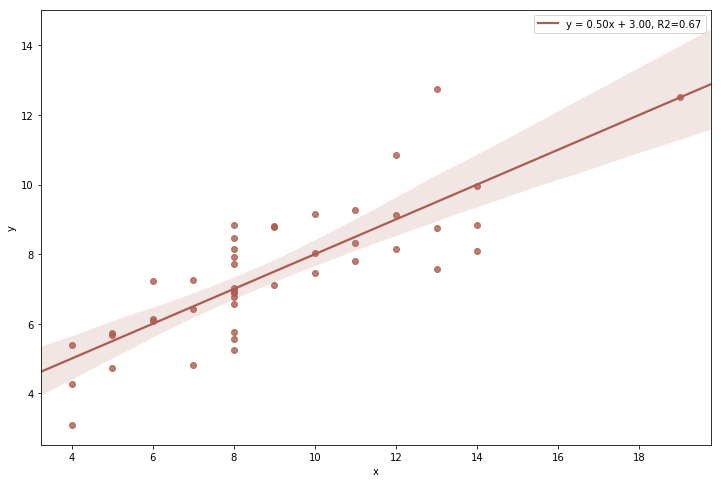

In [125]:
plot_linreg(data.x, data.y)


- Plot the data, faceted by data set (i.e., 4 subplots), drawing the points at their specified x/y values, and draw regression lines. * * Label the regression lines with slope, intercept, and r2.

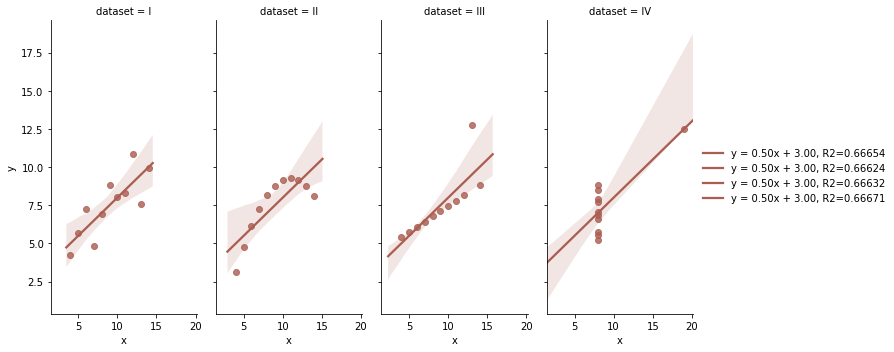

In [128]:
g = sns.FacetGrid(data=data, col="dataset", height=5, aspect=0.5)
g = g.map(plot_linreg, 'x', 'y')
_ = g.add_legend()

---